# <CENTER><U>**`PRINCIPAL COMPONENT ANALYSIS (PCA)`**</U></CENTER>


Large datasets are increasingly widespread in many disciplines. In order to interpret such datasets, methods are required to drastically reduce their dimensionality in an interpretable way, such that most of the information in the data is preserved. Many techniques have been developed for this purpose, but principal component analysis (PCA) is one of the oldest and most widely used. Its idea is simple—reduce the dimensionality of a dataset, while preserving as much ‘variability’ (i.e. statistical information) as possible.



Lets understand it using MNIST data:<br>
DOWLOAD DATASET: https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

Here this is very short assignment where you will understand concept of PCA while doing handson. Do go through the video links provided so that you understand the topics well.

### **`File used in below video`**: https://drive.google.com/file/d/1PxOQIeuEFs-Q1HptYTWXD3fooji8CtIV/view?usp=sharing

In [ ]:
#Import Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## Load MNIST Data (train.csv)
d0 = pd.read_csv('/content/train.csv')


In [ ]:
# print first five rows of d0.
d0.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **`Data Dict:`**<br>
`The data files train.csv contain gray-scale images of hand-drawn digits, from zero through nine.`

`Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.`
`Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.`

`The training data set has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.`

In [ ]:
# save the labels into a variable l.
l = d0['label']


In [ ]:
# Drop the label feature from d0 and store the pixel data in d.
d = d0.drop('label', axis=1)


In [ ]:
#print shape of pixel and label data
print(d.shape)
print(l.shape)


(42000, 784)
(42000,)


In [ ]:
idx = 1
# print label value for above index
print(l[idx])


0


#### display or plot above label.

Reference: 


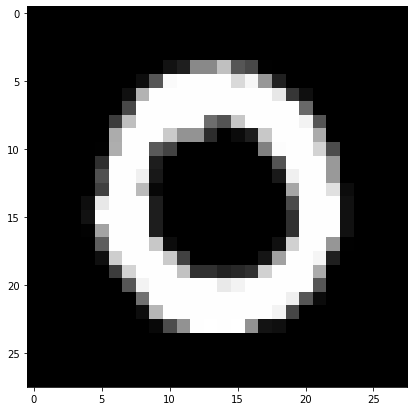

In [ ]:
plt.figure(figsize=(7,7))

# reshape from 1d to 2d pixel array ( prefer 28 X 28)
grid_data= d.loc[idx].values.reshape(28,28)


#plot above grid image with cmap as gray and interpoltion as none
plt.imshow(grid_data, cmap='gray', interpolation='none')


#display plot
plt.show()



#  **`2D Visualization using PCA`** 




In [ ]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)            #labels with 15k data points
data = d.head(15000)              #data with 15k data points


print('the shape of sample data = ', data.shape)


the shape of sample data =  (15000, 784)


### **`Data-preprocessing: Standardizing the data`**




In [ ]:
# import standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


#fit transform data
standardized_data = scaler.fit_transform(data)


#print shape of standardized_data
print(standardized_data.shape)



(15000, 784)


### **`find the co-variance matrix which is : A^T * A`**

Find the covariance matrix of the dataset by multiplying the the matrix of features by its transpose. It is a measure of how much each of the dimensions vary from the mean with respect to each other.

The covariance is measured between 2 dimensions to see if there is a relationship between the 2 dimensions, e.g., relationship between the height and weight of students. 

A positive value of covariance indicates that both the dimensions are directly proportional to each other, where if one dimension increases the other dimension increases accordingly.

A negative value of covariance indicates that both the dimensions are indirectly proportional to each other, where if one dimension increases then other dimension decreases accordingly.


If in case the covariance is zero, then the two dimensions are independent of each other.

In [ ]:

sample_data = standardized_data

#use matrix multiplication using numpy to find covariance matrix
covar_matrix = np.matmul(sample_data.T, sample_data)



#print shape of covar_matrix


print('The shape of variance matrix =', covar_matrix.shape)

The shape of variance matrix = (784, 784)


### **`Computing Eigenvectors and Eigenvalues`**


The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

The eigenvectors and eigenvalues of the covariance matrix will give the principal components and a vector that we can use to project high-dimensional inputs to the lower-dimensional subspace.

In [ ]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh
 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print('Shape of eigen vectors =', vectors.shape)




# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T


print('Updated shape of eigen vectors = ', vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors = (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [ ]:
# projecting the original data sample on the plane 
#formed by multiplication of two principal eigen vectors with transposed sample_data




# multiplication of two principal eigen vectors with transposed sample_data to get 2d projected data
new_coordinates = np.matmul(vectors, sample_data.T)

# print resultant new data points
print("resultanat new data point's shape ", vectors.shape, "X", sample_data.T.shape, "=" , new_coordinates.shape)


resultanat new data point's shape  (2, 784) X (784, 15000) = (2, 15000)


In [ ]:
import pandas as pd

# appending label to the 2d projected data
#new_coordinates = 


# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(new_coordinates.T,columns=['1st_principal', '2nd_principal'])
dataframe['label'] = d0['label']

# print head
dataframe.head()



,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1
1,6.193635,19.305278,0
2,-1.909878,-7.678775,1
3,5.525748,-0.464845,4
4,6.366527,26.644289,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


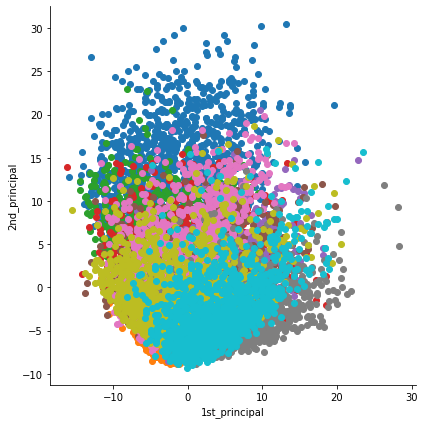

In [ ]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue='label' ,size=6).map(plt.scatter, '1st_principal', '2nd_principal')
plt.show()



### **`PCA using Scikit-Learn`**

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# import decomposition
from sklearn.decomposition import PCA
# initializing the pca
pca = PCA(n_components=2) 



#### configuring the parameteres

In [ ]:
# the number of components = 2
#pca.n_components = 2

# fit transform sample data using pca 
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print('shape of pca_reduced.shape = ', pca_data.shape)




shape of pca_reduced.shape =  (15000, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


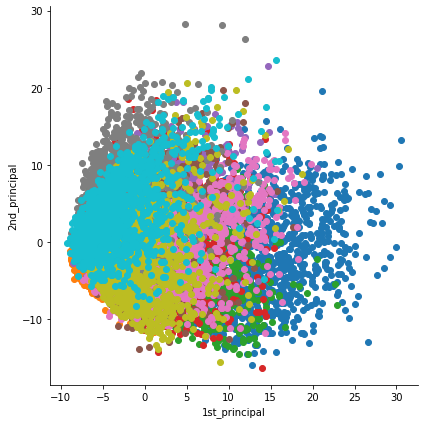

In [ ]:
# attaching the label for each 2-d data point (Hint: Use np.vstack)
pca_data = np.vstack((pca_data.T, labels)).T


# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=('1st_principal','2nd_principal', 'label'))

# plot using facetgrid
sn.FacetGrid(pca_df, hue='label', size=6).map(plt.scatter, '1st_principal','2nd_principal')
plt.show()

### **`PCA for dimensionality reduction (not for visualization)`**

The distribution of explained variance for each principal component gives a sense of how much information will be represented and how much lost when the full, 64-dimensional input is reduced using a principal component model (i.e., a model that utilizes only the first  N  principal components).

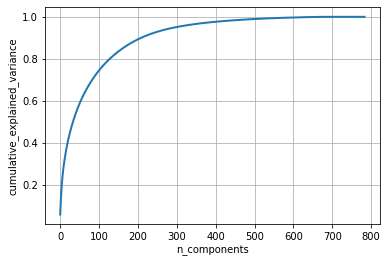

In [ ]:

# the number of components = 784
pca.n_components = 784


# fit transform sample data using pca 
pca_data = pca.fit_transform(sample_data)



#calculating percentage of variance explained in the data
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)



#cumulative sum of the percentage_var_explained
cum_var_explained = np.cumsum(percentage_var_explained)


# Plot the PCA spectrum

plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_variance')
plt.show()




From above you can see that if we take 200-dimensions, approx. 90% of variance is expalined. 

Our intention with the princpal component analysis is to reduce the high-dimensional input to a low-dimensional input. Ultimately that low-dimensional input is intended for use in a model, since adding more components increases the cost and the accuracy.



### **`PCA is a method that brings together:`**
1. A measure of how each variable is associated with one another. (Covariance matrix.)

2. The directions in which our data are dispersed. (Eigenvectors.)

3. The relative importance of these different directions. (Eigenvalues.)

4. PCA combines our predictors and allows us to drop the Eigenvectors that are relatively unimportant.





### **`Summary`**
1. PCA helps you interpret your data, but it will not always find the important patterns. 
2. Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. 
3. It does this by transforming the data into fewer dimensions, which act as summaries of features.

### **`Conculsion:`**
1. Principal Component Analysis (PCA) is a popular and powerful tool in data science.
2. It provides a way to reduce redundancy in a set of variables. We’ve seen that this equivalent to an eigenvector decomposition of the data’s covariance matrix. 
3. Applications for PCA include: dimensionality reduction, clustering, and outlier detection.



